In [1]:
## my functions
from data_processing import *

This notebook reads, preprocess and analyse original sentences from Wikipedia articles. <br>
Notebook compares Polish and English version of dataset. <br> <br>
Final dataset is a concatenation of smaller sets with sentences of slightly different characteristics:

- **biased** - biased sentences tagged in Wikipedia articles
- **reviewed** - reviewed version of previosly biased sentences
- **unbiased** - sentences from reviewed articles that were not marked as biased
- **featured** - sentences downloaded from 'featured articles' - articles of very high quality (shouldn't contain any bias) 
- **deceiving_sentences** - sentences tagges as 'deceiving' (only PL)

Aim of this notebook is to preprocess, analyse and compare characteristics of sentences within these sets.

##### Read data

In [2]:
# Read data
pl = unify_structure(LANG = 'PL')
en = unify_structure(LANG = 'EN')

##### Adding deceiving sentences

In [3]:
# Adding sentences with deceiving phrases to the Polish version
deceiving = read_data('dataPL/deceiving_sentences')
print("Added deceiving sentences:", len(deceiving))

print('\nEXAMPLES:')
for i in range(5):
    print(random.choice(deceiving), '\n')
    
pl['biased'] = pl['biased'] + deceiving

Added deceiving sentences: 579

EXAMPLES:
w literaturze definiowane często jako pojęcie pełni władzy książęcej , która nie znała żadnych ścisłych granic . 

w tłumaczeniu na język polski poprawna wydaje się nazwa : amerykański pies eskimoski ; ze względu jednak na brak uznania rasy przez fci nie występuje ona w oficjalnej polskiej terminologii kynologicznej . 

paprocki . 

mocno przyczynił się do tych sukcesów , a fani uznali go za najbardziej lubianego gracza drużyny . 

zdobył mont blanc ( 4810 m n.p.m . ) , który należy do korony europy i , jako najwyższy szczyt europy ( według geografów ) , do korony ziemi . 



##### Deduplicate
Drop duplicates within biased and reviewed datasets.

In [4]:
# Deduplicate sentences within biased and reviewed datasets
print('POLISH:')
pl = drop_biased_dups(pl)

print('\nENGLISH:')
en = drop_biased_dups(en)

POLISH:
Biased deleted: 113
Reviewed deleted: 97

ENGLISH:
Biased deleted: 759
Reviewed deleted: 854


##### Drop duplicates between reviewed and biased
They appear if the sentence was corrected more than once.
I am going to keep first version of biased sentence and the newest version in case of reviewed sentence.
I will be done be creating for loop between sentence and its neighbours within a set and calculating BLUE score between them. Too simillar sentences will be dropped. It is sufficient to check for duplicates only neigbours of a sentence as sentences from one article (but different reviews) are close to eachother in the dataset.

| Biased | Reviewed |
| --- | --- |
| rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków . | **według badań statystycznych** rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków . |
|**według badań statystycznych** rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków .|**według badań statystycznych przeprowadzonych w usa** rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków .|

<br>
After pre-processing:

| Biased | Reviewed |
| --- | --- |
| rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków . | **według badań statystycznych przeprowadzonych w usa** rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków  |


In [5]:
biased_dups_pl, biased_indices_pl = similar_sent(pl['biased'], 50)
reviewed_dups_pl, reviewed_indices_pl = similar_sent(pl['reviewed'], 50)

#biased_dups_en, biased_indices_en = similar_sent(en['biased'], 50)
#reviewed_dups_en, reviewed_indices_en = similar_sent(en['reviewed'], 50)

In [6]:
print('BIASED POLISH')
print(biased_dups_pl[:3])

print('\nREVIEWED POLISH')
print(reviewed_dups_pl[:3])

print('\nBIASED ENGLISH')
#print(biased_dups_en[:3])

print('\nREVIEWED ENGLISH')
#print(reviewed_dups_en[:3])

BIASED POLISH
[('rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków .', 'według badań statystycznych rozwody wśród osób wierzących ( poza katolikami i luteranami ) są częstsze niż w przypadku ateistów i agnostyków .'), ('opublikowany w 2008 roku w contraception 20-letni przegląd piśmiennictwa wykazał , że w badaniach , które autorzy przeglądu uznali za poprawnie wykonane , nie było zależności pomiędzy dokonaniem aborcji a zdrowiem psychicznym po wielu latach od aborcji ( lub zależność była mała ) ; równocześnie badania o złej jakości metodologicznej często postulowały taką zależność .', 'opublikowany w 2008 roku w contraception 20-letni przegląd piśmiennictwa wykazał , że w badaniach , które autorzy przeglądu uznali za poprawnie wykonane , nie było zależności pomiędzy dokonaniem aborcji a zdrowiem psychicznym po wielu latach od aborcji ( lub zależność była mała ) ; równocześnie badania o złej jakości metodologicznej często p

In [7]:
print('Biased POLISH')
pl = clean_biased(pl, biased_indices_pl)
print('\nReviewed POLISH')
pl = clean_reviewed(pl, reviewed_indices_pl)

print('\nBiased ENGLISH')
#en = clean_biased(en, biased_indices_en)
print('\nReviewed ENGLISH')
#en = clean_reviewed(en, reviewed_indices_en)

Biased POLISH
Number of duplicates: 336

Reviewed POLISH
Number of duplicates: 332

Biased ENGLISH

Reviewed ENGLISH


##### Delete text in brackets
Delete text in brackets that in most cases is just additional information like dates, names etc. that is rather irrelevant for bias detection but can add noise to the data and hamper classification

In [8]:
print('POLISH:')
in_brackets_examples(pl)

POLISH:
BIASED
( ur . 10 maja 1890 w wrzburgu , stracony 16 października 1946 w norymberdze )
( m.in . koncerty rockowe i pikiety pod placówkami dyplomatycznymi )
( gr . archimedes ho syrakosios ; ok. 287-212 p.n.e . )
( ur . 7 listopada 1913 w mondovi , zm . 4 stycznia 1960 w villeblevin )
( spółgłoska nosowa miękkopodniebienna )
( - a- , bez + gnsis , wiedzy ; od gnostycyzmu )
REVIEWED
( ur . 10 maja 1890 w wrzburgu , stracony 16 października 1946 w norymberdze )
( m.in . koncerty rockowe i pikiety pod placówkami dyplomatycznymi )
( gr . archimedes ho syrakosios ; ok. 287-212 p.n.e . )
( ur . 7 listopada 1913 w mondovi w algierii , zm . 4 stycznia 1960 w villeblevin )
( - a- , bez + gnsis , wiedzy ; od gnostycyzmu )
( poza katolikami i luteranami )
UNBIASED
( gnstos `` nieznany , niepoznawalny '' )
( np . poprzez akt apostazji )
( 2005 )
( non-denominational )
( tzw . `` obrońcy życia '' , ruchy pro-life )
( zatrzymanie akcji serca w rozkurczu )
FEATURED
(ur. 31 lipca 1891 w suwałkac

In [9]:
print('ENGLISH:')
in_brackets_examples(en)

ENGLISH:
BIASED
(mrt)
(born october 11, 1925)
(aramaic: ; "guardians of the city")
(moscow patriarchate)
(symbiosis centre for information technology)
(224310 ah; 839923 ad)
REVIEWED
(mrt)
(born october 11, 1925)
(aramaic: ; "guardians of the city")
(moscow patriarchate)
(symbiosis centre for information technology)
(224310 ah; 839923 ad)
UNBIASED
(1989)
(born december 7, 1928)
( in arabic)
(junior engineering and technical society)
(kitab al-hudud 017, number 4207)
('people from other countries')
FEATURED
(plus one underground floor)
(leed)
(leed-cs)
(190 m)
(56,000 m2)
(91,000 l)


In [10]:
pl = delete_in_brackets(pl)
en = delete_in_brackets(en)

##### Analyse punctuations

In [11]:
pl_punc = check_punc(pl)
en_punc = check_punc(en)

In [12]:
print('Punctuation POLISH')
print(pl_punc)

print('\nPunctuation ENGLISH')
print(en_punc)

Punctuation POLISH
{',': 50513, '.': 46888, '-': 3001, '``': 2824, "''": 2721, ':': 1995, ';': 1189, '(': 655, '"': 539, '/': 536, "'": 445, '[': 401, '%': 313, ')': 290, '?': 233, '&': 202, '...': 162, '!': 120, '--': 112, '+': 94, '=': 93, '>': 77, '<': 66, '{': 38, '),': 37, '#': 36, '}': 36, '*': 34, '[...]': 31, ']': 28, '..': 22, ').': 22, '|': 17, '`': 10, '....': 10, '$': 9, '~': 7, '//': 5, '].': 5, '],': 4, '$.': 4, '[...].': 4, "/'": 4, '.???': 3, '@': 2, '/,': 2, '...;': 2, '..."': 2, '[...],': 2, '~~~~': 1, "'-": 1, '[?': 1, '(?': 1, '[..]': 1, '):': 1, ':]': 1, '*-': 1, '/.': 1, '"...': 1, '-:': 1, '***': 1, '(=': 1, '**': 1, '(=?': 1, '(<': 1, '.</': 1, '...,': 1, '*.': 1, '[?]': 1}

Punctuation ENGLISH
{'"': 247025, ',': 121559, '.': 100249, "'": 18420, '$': 14479, '-': 13398, '&': 7575, '...': 7033, '[': 6207, ';': 5584, '(': 3960, '#': 2718, ':': 2445, '/': 1809, '--': 1315, '=': 1224, '"[': 1096, '+': 1014, '"...': 852, '",': 539, ')': 512, '|': 496, '".': 372, '),':

##### Leave only basic punctuation

In [13]:
# Leave only:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
print('Deleted in POLISH:\n')
pl = remove_punc(pl)

Deleted in POLISH:

Deleted signs: dict_keys(['//', '``', "''", '...', '..', '--', '....', '~~~~', "'-", '[?', '.???', '(?', '[...]', '[..]', '):', '],', '].', '$.', '[...].', '/,', "/'", ':]', '*-', '...;', '/.', '..."', '"...', '[...],', '-:', '***', '(=', '**', '(=?', '(<', '.</', '...,', '*.', '[?]'])


In [15]:
print('Deleted in ENGLISH:\n')
en = remove_punc(en)

Deleted in ENGLISH:

Deleted signs: dict_keys(['...', '".', '%,', "',", '}}', '--', '";', "'''", "'-", '"-', '~$', '{{', '"...', '-->', '.,', '..', '</', '-,', '/,', '..."', '.)', '"`', "'...", '},', '/>', '!=', '://', '....', "''", '!,', "'''''')", '{"', '@#$', '\'"', '.|', "')", '"\'', '"|', ',;', "''''", '$,', '//),', '//', '\'\'\'"', ';)', "''''.", '{{}}', '---', "'--", '//,', '???)', "'.", '...".', '(;', '<---', '!!', '");', '"..', '"/"', '":', '("-', ")''", '->', '","', "/'", '?,', '):', "('", '.</', '/"', ':"', '">\'', '">', "...'", ',,', '.<!--', "-'", "';", '-$', '}}</', ':(', '$!', '"...&', '<!--', ':,', '.\'"', ':)', '+/-', '``', ';-)', '%;"', '==', '!!!', '"#".', '})', '<<>>', "'@',", '"".', '$.', ');', '"|"', '").', ',<!--', '}}-', ':-', ',<', '...,', '!".', '="', '"<>', '.<', '.."', "''''''", '||', '..,', ',,,,.', '<<', '>>', '{{#', '>=', '}}}', '></', '};', '/>:', "'':", '===', "'',", '(??', '"=', '+"', ',,.', '\'\'"', '...."', '&=', '.....', '"$', ",'", '<-', "'+',", '%

##### Non-printable signs
Signs that cause errors while vectorizing.

In [16]:
np_pl = non_printable(pl)
np_en = non_printable(en)

In [17]:
print('POLISH:')
print(np_pl)

print('\nENGLISH:')
print(np_en)

POLISH:
{'é': 1501, 'о': 1037, 'е': 903, 'ö': 866, 'а': 858, 'ü': 779, 'ä': 761, 'т': 741, 'и': 678, 'н': 662, 'с': 507, 'к': 438, 'р': 433, 'α': 416, 'л': 402, 'в': 402, 'á': 333, 'м': 329, 'д': 318, 'у': 310, 'ь': 309, 'è': 268, 'я': 237, 'п': 233, 'й': 233, 'ы': 226, 'б': 226, 'ч': 208, 'ο': 200, '²': 188, 'ι': 183, 'ε': 169, 'ō': 167, 'з': 163, 'š': 156, 'ς': 151, 'β': 147, 'ç': 146, 'г': 146, 'ə': 146, 'ν': 146, 'č': 141, 'ă': 135, 'í': 129, 'ш': 121, 'ø': 117, 'ρ': 117, 'κ': 116, 'τ': 116, 'ж': 114, 'ß': 113, 'υ': 111, '³': 108, 'μ': 107, 'λ': 98, 'å': 96, 'σ': 96, 'π': 87, 'ː': 79, 'ю': 79, 'ɪ': 78, 'х': 76, 'ñ': 71, 'ô': 66, 'η': 63, 'ā': 59, 'ū': 58, 'δ': 57, 'ё': 55, 'ц': 53, 'ω': 52, 'ˈ': 51, 'θ': 45, 'φ': 45, 'ú': 41, 'γ': 41, 'ž': 40, 'ë': 39, 'æ': 38, 'ʊ': 37, 'â': 35, 'à': 35, 'ê': 31, 'э': 29, 'ð': 26, 'щ': 25, 'χ': 24, 'і': 22, 'î': 21, 'ã': 20, 'ý': 20, 'ř': 20, 'ɑ': 19, 'µ': 19, 'ọ': 18, 'ʾ': 18, 'ɔ': 18, 'ț': 18, 'ɛ': 18, 'ό': 18, 'ф': 17, 'ī': 17, 'ί': 17, 'ï': 16,

In [18]:
np_pl.update(np_en)
to_drop = np_pl

del np_pl
del np_en

In [19]:
pl = replace_signs(pl, to_drop)
en = replace_signs(en, to_drop)

##### Delete empty spaces

In [20]:
pl = delete_empty_spaces(pl)
en = delete_empty_spaces(en)

##### Lengths of sentences
Analyse distributions of sentences' lengths.

In [21]:
print('POLISH')
lengths_pl, shorts_pl, longs_pl = count_sent_lengths(pl, short_threshold = 2, long_threshold = 100)
print('\nENGLISH')
lengths_en, shorts_en, longs_en = count_sent_lengths(en, short_threshold = 2, long_threshold = 100)

POLISH
biased | minimum length: 1 max_length: 282
reviewed | minimum length: 1 max_length: 280
unbiased | minimum length: 1 max_length: 180
featured | minimum length: 1 max_length: 226

ENGLISH
biased | minimum length: 1 max_length: 292
reviewed | minimum length: 1 max_length: 287
unbiased | minimum length: 1 max_length: 214
featured | minimum length: 2 max_length: 306


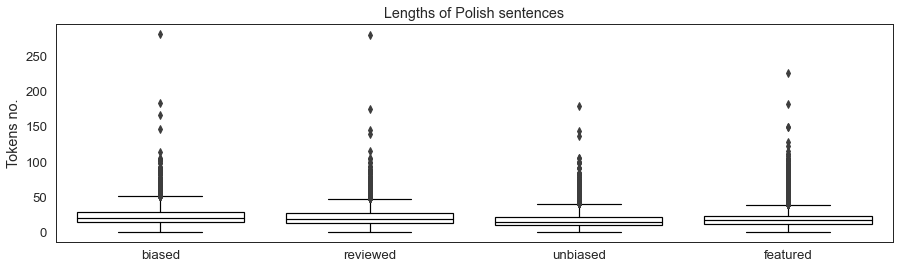

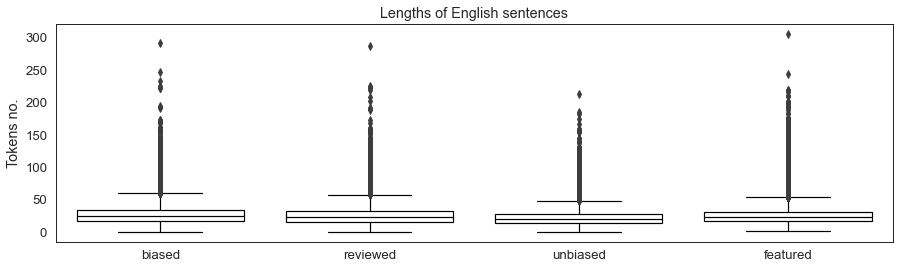

In [22]:
plot_lengths(lengths_pl, title = "Lengths of Polish sentences")
plot_lengths(lengths_en, title = "Lengths of English sentences")

In [23]:
# Too long sentences
for i in range(3):
    print(longs_pl[i], '\n')
    print(longs_en[i], '\n')

pakt o przyjaźni miedzy hitlerowską iii rzeszą i frankistowską hiszpanią przewidywał m.in . : konsultacje jeśli chodzi o interesy międzynarodowe , wzajemne poparcie w razie konfliktow dyplomatycznych z jakąś stroną trzecią , zobowiązanie do niezawierania żadnych umów szkodzących partnerowi , współpracę wojskową a w końcowych artykułach strony zobowiązywały się do rozwijania wzajemnych stosunków gospodarczych i kulturalnych jak na ironię w haśle o franco stoi że w 1939 r postawiono tamę faszyzmowi a koszel stwierdza że podpisanie porozumień było szczytowym punktem zblizenia hiszpanii z mocarstwami osi w 1939 i cytuje książkę batowskiego europa zmierza ku przepaści : hiszpania bez formalnego sojuszu stawała się najbliższym współpracownikiem politycznym mocarstw osi porozumień na nalegania hiszpanów nie opublikowano . 

15); but that is not entirely true given the immense political power the catholic majority in boston and, for that matter, the entire state of massachusetts, had chosen ov

In [24]:
# Too short sentences
for i in range(5):
    print(shorts_pl[i], '\n')
    print(shorts_en[i], '\n')

otóż pytanie 

sami brady 

netscape browser 

 

 

 

dialekt śląski 

atharva-veda 

splot jądrowy 

 



Too long or too short sentences may be result of poor sentence tokenization. If the sentence containing bias is too long it also may introduce only noise, as there will be a lot of unbiased text and only one biased fragment.

In [25]:
print('POLISH')
pl = clean_by_length(pl, 2, 70)

print('\nENGLISH')
en = clean_by_length(en, 2, 70)

POLISH
biased dropped sentences 65
reviewed dropped sentences 47
unbiased dropped sentences 116
featured dropped sentences 154

ENGLISH
biased dropped sentences 2994
reviewed dropped sentences 2539
unbiased dropped sentences 3816
featured dropped sentences 9263


POLISH
biased | minimum length: 3 max_length: 70
reviewed | minimum length: 3 max_length: 70
unbiased | minimum length: 3 max_length: 70
featured | minimum length: 3 max_length: 70

ENGLISH
biased | minimum length: 3 max_length: 70
reviewed | minimum length: 3 max_length: 70
unbiased | minimum length: 3 max_length: 70
featured | minimum length: 3 max_length: 70


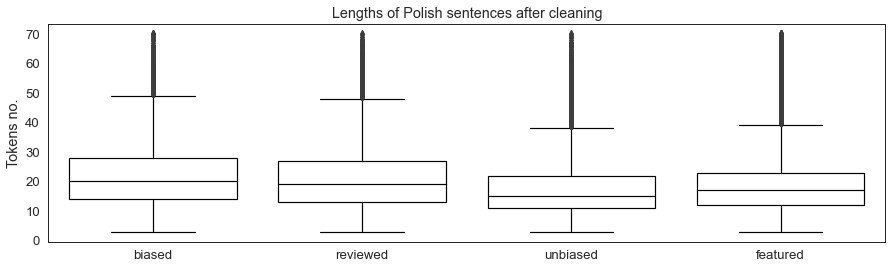

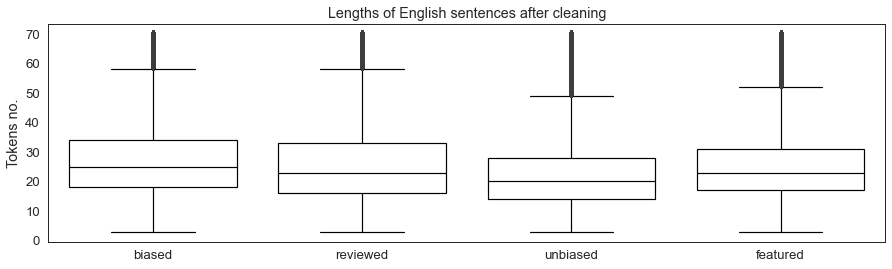

In [26]:
print('POLISH')
lengths_pl, _, _ = count_sent_lengths(pl, short_threshold = 2, long_threshold = 100)
print('\nENGLISH')
lengths_en, _, _ = count_sent_lengths(en, short_threshold = 2, long_threshold = 100)

plot_lengths(lengths_pl, title = "Lengths of Polish sentences after cleaning")
plot_lengths(lengths_en, title = "Lengths of English sentences after cleaning")

##### Sentences with high non-word signs ratio

In [27]:
pl_nw_ratios, high_ratios_pl = count_nw_ratios(pl)
en_nw_ratios, high_ratios_en = count_nw_ratios(en)

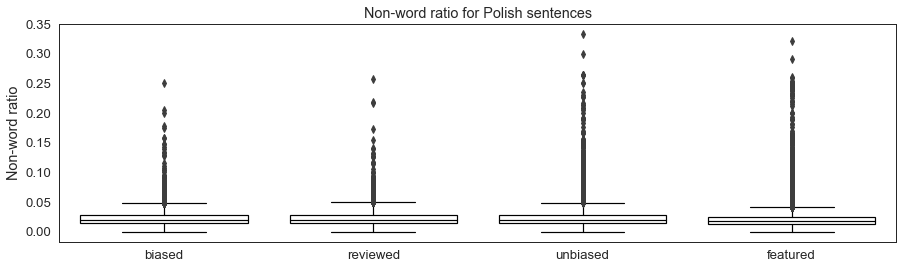

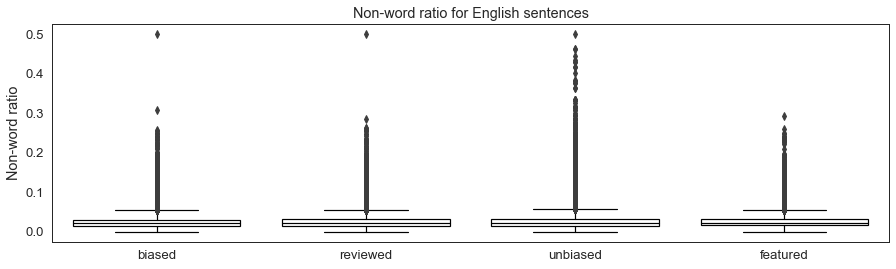

In [28]:
wnw_distributions(pl_nw_ratios, title = 'Non-word ratio for Polish sentences')
wnw_distributions(en_nw_ratios, title = 'Non-word ratio for English sentences')

In [29]:
print("SENTENCES WITH NON-WORD RATIO HIGHER THAN SET THRESHOLD = 0.12\n")

print("Noisy sentences POLISH:")
print(random.sample(high_ratios_pl, 10))

print("\nNoisy sentences ENGLISH:")
print(random.sample(high_ratios_en, 10))

SENTENCES WITH NON-WORD RATIO HIGHER THAN SET THRESHOLD = 0.12

Noisy sentences POLISH:
['w półfinale pokonała anastasiję myskinę 2:6, 6:2, 6:2, a w finale, serenę williams 4:6, 6:2, 6:4.', 'wyniki meczu: sesja i: 67-59, 89-0, 64-35, 71-64, 62-8, 86-6, 67-39, 6-110, 122-0 sesja ii: 8-117, 36-72, 75-38, 6-67, 72-48.', 'głoska // w rp współcześnie brzmi raczej jak /a/ , a /e/ bardziej jak //.', 'wyniki spotkania: sesja i: 1-64, 107-0, 51-75, 107-14, 90-0, 64-56, 17-78, 87-0, 78-0 sesja ii: 86-0, 87-24, 39-71, 80-44, 81-0.', '< a.j. > < ? > 14:55 , 11 sty 2007', '5-43; 6,1-56; 7,1-37; 8,1-38; 9,1-50; 10,1-52; 11,1-33; 12,1-38; 13,16-29; 14,4-72; 15,1-47; 16,1-12 .wszyscy badacze są zgodni, że kodeks zasadniczo reprezentuje bizantyńską tradycję tekstualną.', 'wyniki meczu: sesja i: 77-30, 1-101, 0-70, 24-90, 83-8, 69-0, 0-84, 52-64, 96-1 sesja ii: 70-25, 121-0, 65-23, 75-18, 41-63, 114-0, 73-1.', "v ' = o & times v", '83.142.201.60 11 : 59 , 3 lis 2006', 'plozja, inaczej wybuch, to dość gw

In [30]:
def clean_nw_ratios(d, ratio_threshold = 0.12):
    
    """ Drop sentences with too high ratio of non-word signs
    """
    nw_ratios = defaultdict(list)
    
    for file_name, sentences in d.items():
        
        initial_length = len(sentences)
        clean_sentences = []
        
        for sent in sentences:           
            non_word_signs = len(re.findall('[^\\w\s]', sent))
            all_signs = len(sent)
            
            try:
                wnn_ratio = non_word_signs / all_signs 
            except ZeroDivisionError:
                wnn_ratio = 1
            
            if wnn_ratio <= ratio_threshold:
                clean_sentences.append(sent)
                
        d[file_name] = clean_sentences
        print(file_name.upper(), 'dropped:', initial_length - len(clean_sentences))  
        
    return d

In [31]:
print('POLISH')
pl = clean_nw_ratios(pl, ratio_threshold = 0.12)

print('\ENGLISH')
en = clean_nw_ratios(en, ratio_threshold = 0.12)

POLISH
BIASED dropped: 15
REVIEWED dropped: 12
UNBIASED dropped: 76
FEATURED dropped: 130
\ENGLISH
BIASED dropped: 132
REVIEWED dropped: 172
UNBIASED dropped: 1205
FEATURED dropped: 231


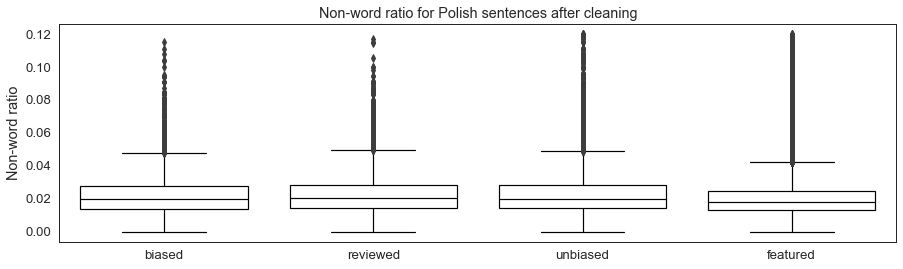

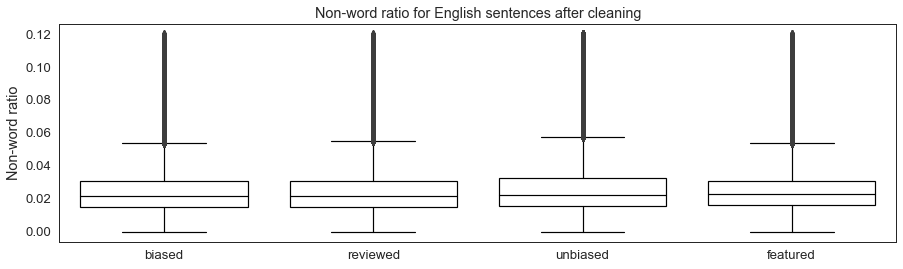

In [32]:
pl_nw_ratios, _ = count_nw_ratios(pl)
en_nw_ratios, _ = count_nw_ratios(en)

wnw_distributions(pl_nw_ratios, title = 'Non-word ratio for Polish sentences after cleaning')
wnw_distributions(en_nw_ratios, title = 'Non-word ratio for English sentences after cleaning')

##### Number of sentences per dataset

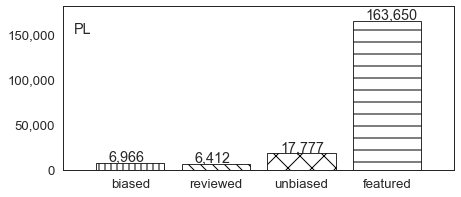

In [33]:
dist_plot(pl, 'PL')

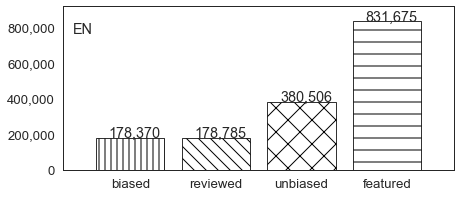

In [34]:
dist_plot(en, 'EN')

#### Word analysis

In [35]:
stopwords_pl = open('polish_stopwords.txt', 'r', encoding = 'utf8').read()
stopwords_pl = stopwords_pl.split("\n")
stopwords_en = get_stop_words('en') + ['one', 'also', 's']

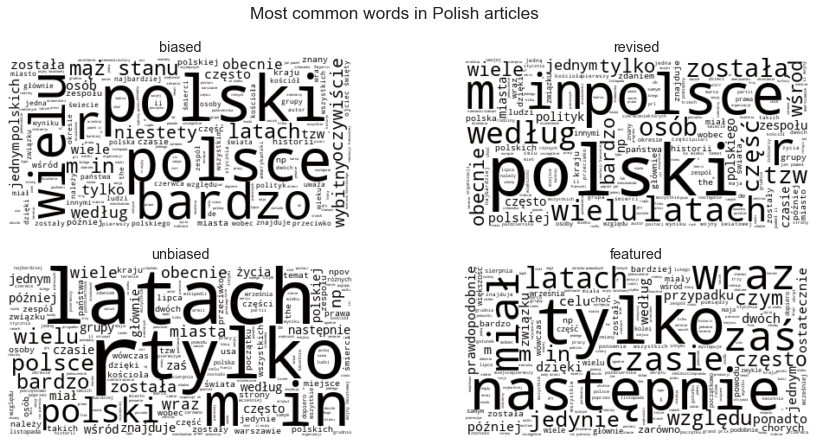

In [36]:
plot_wordclouds(pl, 'PL', title = 'Most common words in Polish articles', stopwords = stopwords_pl)

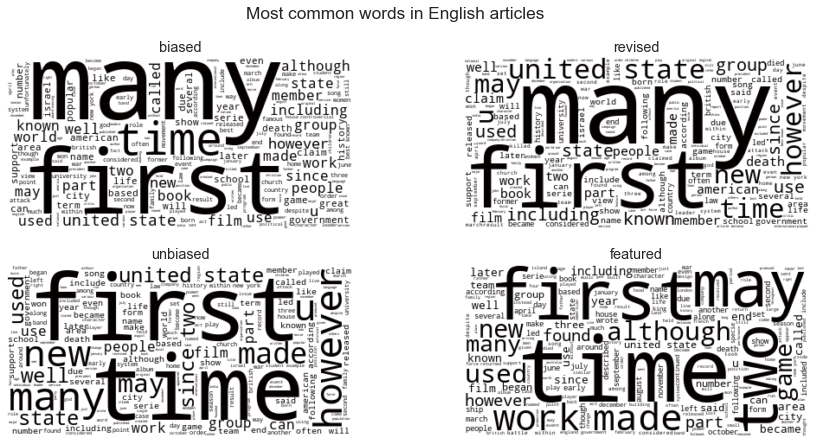

In [37]:
plot_wordclouds(en, 'EN', title = 'Most common words in English articles', stopwords = stopwords_en)

##### Number of unique words

In [38]:
def count_words(d):
    
    text = ""
    
    for file_name, sentences in d.items():
        sentences = " ".join(sentences)
        text = text + " " + sentences
        
    tokens = text.split(" ")
    tokens_cnt = Counter(tokens)
    tokens_cnt = {k: v for k, v in sorted(tokens_cnt.items(), key=lambda item: item[1], reverse=True)}
    
    return tokens_cnt

In [39]:
word_count_pl = count_words(pl)
word_count_en = count_words(en)

In [40]:
print('There is {:,} unique words in Polish sets'.format(len(word_count_pl)))
print('There is {:,} unique words in English sets'.format(len(word_count_en)))

There is 341,739 unique words in Polish sets
There is 899,795 unique words in English sets


In [41]:
print('Percentiles of word frequencies for POLISH:')
count_percentiles(word_count_pl)

print('\nPercentiles of word frequencies for ENGLISH:')
count_percentiles(word_count_en)

Percentiles of word frequencies for POLISH:
10 % of all words appear less often than 1 time\s in text
25 % of all words appear less often than 1 time\s in text
50 % of all words appear less often than 1 time\s in text
75 % of all words appear less often than 3 time\s in text
90 % of all words appear less often than 11 time\s in text
95 % of all words appear less often than 23 time\s in text
99 % of all words appear less often than 111 time\s in text

Percentiles of word frequencies for ENGLISH:
10 % of all words appear less often than 1 time\s in text
25 % of all words appear less often than 1 time\s in text
50 % of all words appear less often than 2 time\s in text
75 % of all words appear less often than 4 time\s in text
90 % of all words appear less often than 15 time\s in text
95 % of all words appear less often than 41 time\s in text
99 % of all words appear less often than 376 time\s in text


##### Merge datasets
Merge dataset and append labels. 

**Label 1: biased** = biased  <br>
**Label 0: unbiased** = reviewed + unbiased + featured

In [42]:
pl = merge_datasets(pl)
en = merge_datasets(en)

POLISH:
Positive label: 4.0%
Positive no.: 6,966
Negative no.: 187,839
All sentences: 194,805



ENGLISH:
Positive label: 11.0%
Positive no.: 178,370
Negative no.: 1,390,966
All sentences: 1,569,336




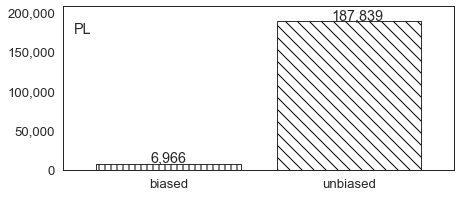

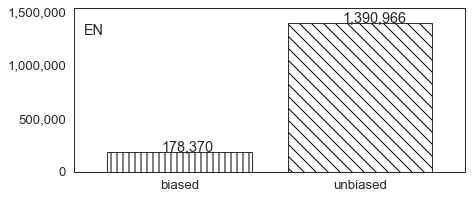

In [43]:
print('POLISH:')
analyse_labels(pl, 'PL')

print('\nENGLISH:')
analyse_labels(en, 'EN')

##### Train test split
Splits Polish and English dataset to train : test : validation sets in ratio 70:20:10. <br>
Save sets in *dataPL* and *dataEN* folders.

In [44]:
print("-------POLISH-------")
train_test_val_split('dataPL', pl)

print("\n-------ENGLISH-------")
train_test_val_split('dataEN', en)

-------POLISH-------

Positive ratios:
 train: 0.04 test: 0.04 val: 0.03

Number of examples:
 train: 136,364 test: 38,960 val: 19,481

-------ENGLISH-------

Positive ratios:
 train: 0.11 test: 0.11 val: 0.11

Number of examples:
 train: 1,098,535 test: 313,867 val: 156,934
